<a href="https://colab.research.google.com/github/alfa7g7/Analisis-Cuantitativo-1er-semestre/blob/main/examen-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS
APLICADAS
MAESTRÍA EN CIENCIA DE DATOS
TIC 60153 – Análisis Cuantitativo
Examen 1 (50 %): Modelo de Regresión Lineal


### 1) Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto (εiiid∼ N(0, σ2)).

In [1]:
#Declaracion de librerias a usar
import pandas as pd
# Importacion de seaborn y asignándole el alias sns, se usa para analisis grafico
import seaborn as sns
# Importacion de matplotlib.pyplot y asignándole el alias plt, se usa analisis grafico
import matplotlib.pyplot as plt

In [2]:
#Empezamos por leer el conjunto de datos "data1" del fichero data_exam1.xlsx
df = pd.read_excel("data_exam1.xlsx", sheet_name = 'data1')
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [3]:
df.info() # Observamos la configuración de las variables de dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
df.head() # observamos los primero 5 datos (filas) del dataframe df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


In [5]:
df.tail() # Observamos los ultimos 5 datos (filas) del dataframe df

,Y,X,Ind
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0
999,65.442984,12.692550,0


In [6]:
df.columns # Observamos los nombres de las columnas o headers del dataframe df

Index(['Y', 'X', 'Ind'], dtype='object')

In [7]:
df.describe() # Observamos la descripcon analitica de los datos tabulares

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


In [8]:
df.isnull().any() # Observando si hay algún dato nulo x2da vez

Y      False
X      False
Ind    False
dtype: bool

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
        <Axes: xlabel='Ind', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>,
        <Axes: xlabel='Ind', ylabel='X'>],
       [<Axes: xlabel='Y', ylabel='Ind'>,
        <Axes: xlabel='X', ylabel='Ind'>,
        <Axes: xlabel='Ind', ylabel='Ind'>]], dtype=object)

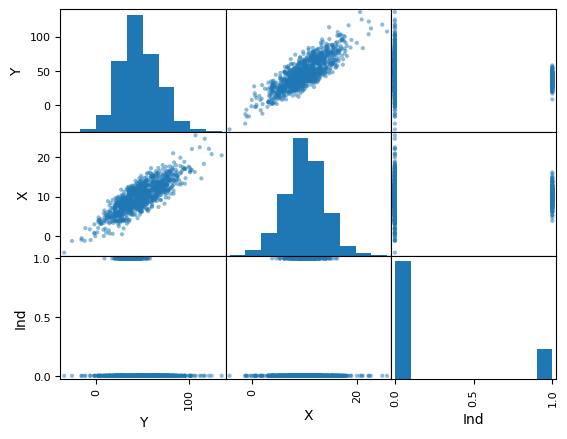

In [9]:
pd.plotting.scatter_matrix(df) # analizamos el histograma y dispersión para cada una de las variables del dataframe

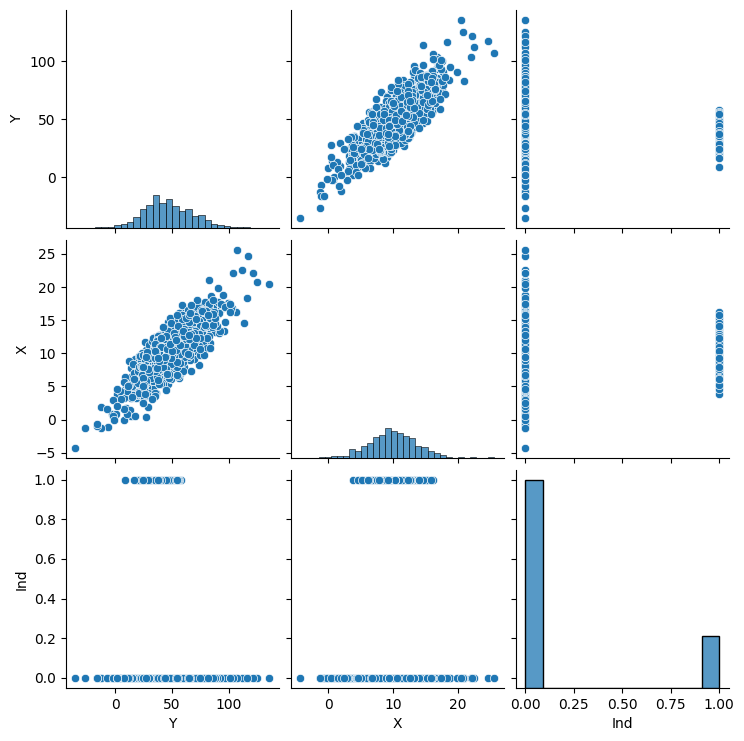

In [10]:
sns.pairplot(df) # es una gráfica igual a la interior con una mejor expresión gráfica

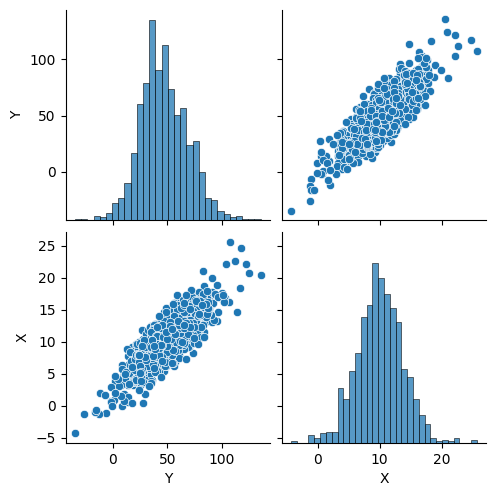

In [17]:
sns.pairplot(df.drop('Ind', axis=1)) # decidimos sacar la variable categorica "Ind" y solo analizar "X" y "Y"

<Axes: >

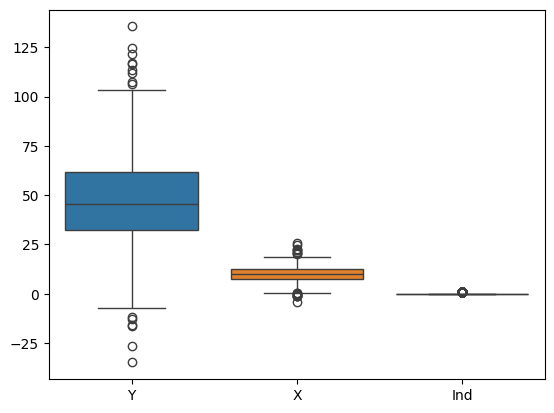

In [18]:
sns.boxplot(df) # Realizamos un diagrama de cajas para observar el comportamiento de los puntos de cada variable

<Axes: >

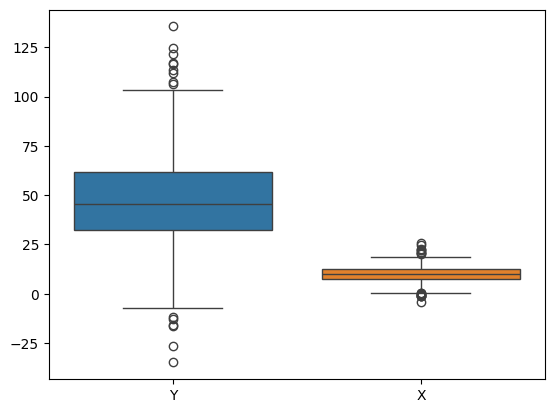

In [13]:
sns.boxplot(df.drop('Ind', axis=1)) # De nuevo observamos solo las 2 variables que no son categóricas

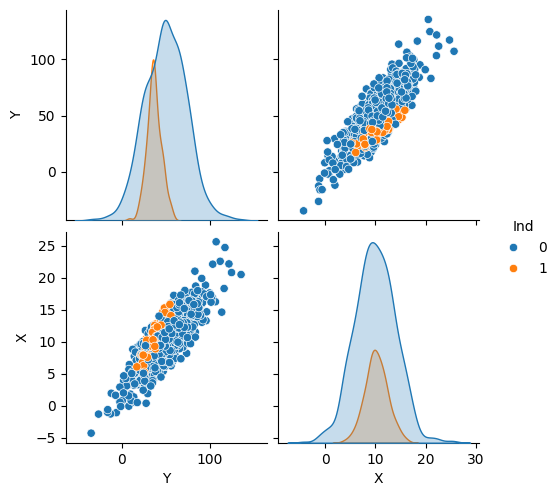

In [14]:
sns.pairplot(df, hue='Ind') # Observamos graficamente el comportamiento de las variables 'X' y 'Y' enfoncandos o usando como pista la variable categórica 'Ind'

### Hallazgos
- El conjunto de datos tiene 1000 filas y 3 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayuscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes y 1 columna con datos enteros. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.

- Tenemos una variable categórica llamada "Ind", la cual toma valores de "0" o "1" que podría indicar un valor de SI o NO, género FEMENINO o MASCULINO; pero son solo conjeturas rápidas.

- De acuerdo a los gráficos de dispersión podemos ver que hay correlacion indicando así su dependencia lineal

In [15]:
df.corr() #determinamos el valor de correlaciones entre las variables

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


In [16]:
import statsmodels.api as sm # Sin argumento aún

X = sm.add_constant(df.drop("Y", axis = 1))
y = df[["Y"]]

model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.25e-308
Time:                        16:48:02   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Consideramos que NO se debe generar un modelo de regresión lineal con la variable categórica (sin interación para la variable 'Y'. Debido que no tienen correlación y adicional gráficamente se intuye que no tienen correlaciones y podría generarse un falso positivo. Su relación no es lineal

Ahora iniciaremos la segunda parte de la pregunta:

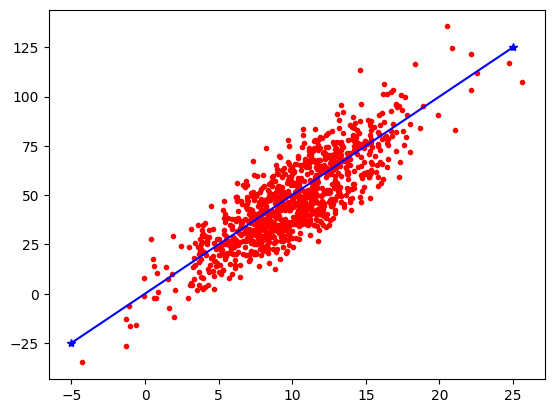

In [47]:
plt.plot(df.X, df.Y, '.', color="red") #realizamos gráfico de dispersión de las variables X s Y


plt.plot([-5, 25], [-25, 125], "*", color = "blue") # Observamos que una recta podría desribir visulamente el grafico de dispersión creado por las 2 variables.
plt.plot([-5, 25], [-25, 125], color = "blue")